In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("Mall_Customers.csv")

In [3]:
data.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [4]:
data.shape

(200, 5)

In [5]:
data.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

In [11]:
data.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1       1   19                  15                      39
1           2       1   21                  15                      81
2           3       0   20                  16                       6
3           4       0   23                  16                      77
4           5       0   31                  17                      40

### Visualizing the number of males and females in the customers

Text(0, 0.5, 'Frequency')

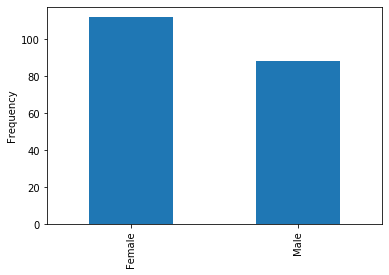

In [6]:
%matplotlib inline
data['Gender'].value_counts().plot(kind='bar')
plt.ylabel('Frequency')

### Visualizing the gender vs age plot using swarm plot 

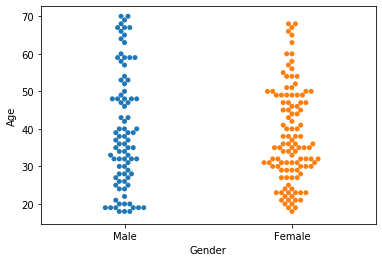

In [7]:
import seaborn as sns
sns.swarmplot(x=data.Gender,y=data.Age)

### Visualizng the number of customers according to their age

Text(0, 0.5, 'Frequency')

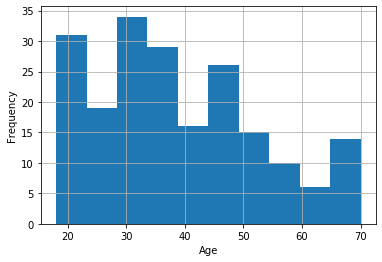

In [8]:
data['Age'].hist()
plt.xlabel('Age')
plt.ylabel('Frequency')

### Analyzing annual income and spending scores

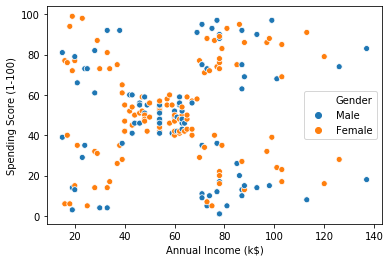

In [9]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',hue='Gender',data=data)

### To transfer Gender from variable to binary format using Label Encoder

In [10]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()
data['Gender']=le.fit_transform(data.Gender)

### To know the optimum number of clusters using elbow method

Text(0.5, 1.0, 'Elbow method')

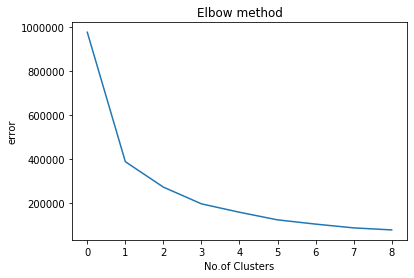

In [11]:
from sklearn.cluster import KMeans
optimum=[]
for i in range(1,10):
    K=KMeans(n_clusters=i)
    K.fit(data)
    optimum.append(K.inertia_)
plt.plot(optimum)
plt.xlabel('No.of Clusters')
plt.ylabel("error")
plt.title("Elbow method")

### To fit the Kmeans cluster to the data

In [12]:
K=KMeans(n_clusters=4)
K.fit(data)
k=K.fit_predict(data)


In [13]:
k

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 1, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

### To know the cluster centres

In [14]:
centers = K.cluster_centers_
centers

array([[164.        ,   0.52777778,  40.80555556,  87.91666667,
         17.88888889],
       [ 92.48484848,   0.43939394,  43.87878788,  57.72727273,
         49.25757576],
       [162.        ,   0.46153846,  32.69230769,  86.53846154,
         82.12820513],
       [ 30.06779661,   0.37288136,  36.10169492,  29.86440678,
         49.86440678]])

#### This plot is used to visualize the cluster segmentation using the columns 3rd and 4th of the data i.e income and spending score

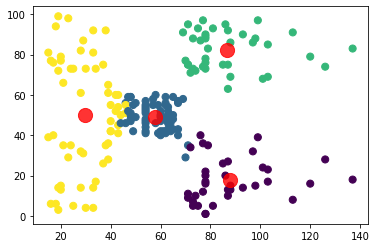

In [15]:
plt.scatter(data.iloc[:,3],data.iloc[:,4],c=k, s=50, cmap='viridis')
plt.scatter(centers[:, 3], centers[:, 4], c='red', s=200, alpha=0.8);

In [16]:
k1=pd.DataFrame(k)
k1.head()

0
0  3
1  3
2  3
3  3
4  3

### To concat the segmentation to the data

In [17]:
s=pd.concat([data,k1],axis=1)

In [18]:
s.rename(columns={0:'Segmentation'}) 

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1       1   19                  15                      39   
1             2       1   21                  15                      81   
2             3       0   20                  16                       6   
3             4       0   23                  16                      77   
4             5       0   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196       0   35                 120                      79   
196         197       0   45                 126                      28   
197         198       1   32                 126                      74   
198         199       1   32                 137                      18   
199         200       1   30                 137                      83   

     Segmentation  
0               3  
1               3  
2               3  
3               3  
4               3  
..            ...  
195             2  
196             0  
197             2  
198             0  
199             2  

[200 rows x 6 columns]